In [1]:
# Import packages
import pandas as pd
#import numpy as np
#from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, cohen_kappa_score
import matplotlib.pyplot as plt
#import seaborn as sns
#import statsmodels.api as sm
#from functools import reduce
import copy
import sys
import pyCompare
sys.path.append("/Users/cr591/OneDrive - University of Exeter/Desktop/pyCGM/pyCGM")
import metrics as cgm
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Upload dataset
df = pd.read_csv('~/OneDrive - University of Exeter/Desktop/PhD/Projects/interpolation-for-hypo-detection/dexcom-maths-exploration/data/tidy_data/interp_dataset.csv')
df.dropna(subset=['glc'], inplace=True)

In [3]:
# Combine baseline and 6-month periods for those who have both by selecting only the ID
df_2weeks = copy.copy(df)
df_2weeks['ID'] = df['ID'].apply(lambda x: x[:4])

In [ ]:
# Interpolation methods
methods = ['glc', 'cut_glc', 'pchip', 'linear', 'cubicspline', 'akima', 
        'polynomial_3', 'polynomial_5', 'polynomial_7', 'matern', 'rq', 'rbf']
# Dictionary for results
results_dict = {}
# Loop through all of the columns and calculate all diabetes metrics
for method in methods:
    sub_df = df_2weeks[['time', 'ID', method]]
    sub_df.columns = ['time', 'ID', 'glc']
    # cut_glc is 15 min intervals, the rest are 5
    if method == 'cut_glc':
        interval_size = 15
    else:
        interval_size = 5
    # Add the results to the dictionary with method name as key
    results_dict[method] = cgm.all_metrics(sub_df, 'time', 'glc', 'ID',
                                           interval_size=interval_size)

In [10]:
# Diabetes metrics for 5-minute data for each person
results_dict['glc'].round(2).sort_values('ID')

,ID,TIR_lv2_hypo,TIR_lv1_hypo,TIR_hypo,TIR_norm,TIR_hyper,TIR_lv1_hyper,TIR_lv2_hyper,number_hypos,avg_length_of_hypo,total_time_in_hypos,number_lv1_hypos,number_lv2_hypos,sd,cv,minimum_glucose,maximum_glucose,average_glucose,percent_missing,ea1c
46,1001,1.24,2.48,3.71,65.99,30.30,19.01,11.29,7,0 days 00:27:51.428571428,0 days 03:15:00,4,3,3.47,39.30,2.22,19.37,8.83,2.76,7.18
59,1003,2.38,7.90,10.28,54.37,35.36,23.18,12.17,19,0 days 01:41:03.157894736,1 days 08:00:00,11,8,4.31,47.87,2.22,22.20,9.00,94.78,7.29
0,1004,1.28,1.73,3.01,40.92,56.08,27.32,28.76,9,0 days 00:52:46.666666666,0 days 07:55:00,4,5,4.77,41.28,2.22,22.20,11.56,94.97,8.90
21,1005,0.00,0.70,0.70,34.49,64.80,24.62,40.18,2,0 days 00:27:30,0 days 00:55:00,2,0,4.91,39.09,3.50,22.20,12.57,0.05,9.53
51,1006,2.63,8.78,11.41,53.39,35.20,14.60,20.59,5,0 days 02:20:00,0 days 11:40:00,2,3,4.78,51.90,2.22,20.37,9.21,36.10,7.42
40,1007,0.00,1.02,1.02,45.98,53.00,25.41,27.60,2,0 days 00:27:30,0 days 00:55:00,2,0,4.52,41.85,3.33,22.20,10.80,0.45,8.42
13,1008,7.28,7.34,14.61,55.81,29.58,20.68,8.90,22,0 days 01:38:24.545454545,1 days 12:05:00,13,9,4.32,52.71,2.22,22.20,8.20,95.63,6.79
9,1010,3.33,8.08,11.41,72.24,16.36,15.37,0.98,33,0 days 01:01:40,1 days 09:55:00,19,14,2.68,37.68,2.22,16.70,7.12,94.58,6.11
38,1011,0.00,0.30,0.30,36.38,63.32,39.43,23.90,1,0 days 00:20:00,0 days 00:20:00,1,0,3.47,30.47,3.39,22.20,11.37,97.74,8.78
44,1012,0.00,0.00,0.00,23.79,76.21,29.03,47.18,0,NaT,0,0,0,4.16,30.94,4.61,22.20,13.45,93.94,10.09


In [8]:
# Statistical overview of diabetes metrics for 5-minute data
results_dict['glc'].describe().round(2)

,TIR_lv2_hypo,TIR_lv1_hypo,TIR_hypo,TIR_norm,TIR_hyper,TIR_lv1_hyper,TIR_lv2_hyper,number_hypos,avg_length_of_hypo,number_lv1_hypos,number_lv2_hypos,sd,cv,minimum_glucose,maximum_glucose,average_glucose,percent_missing,ea1c
count,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,58,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00
mean,1.56,2.66,4.22,49.76,46.02,25.10,20.92,6.58,0 days 01:10:25.337525450,4.06,2.52,3.98,38.68,2.67,21.10,10.35,53.03,8.14
std,2.55,2.45,4.61,17.01,18.00,8.10,16.11,6.02,0 days 00:42:13.900263867,3.61,2.94,0.93,7.52,0.85,2.07,2.03,45.11,1.28
min,0.00,0.00,0.00,10.43,6.77,6.77,0.00,0.00,0 days 00:20:00,0.00,0.00,1.84,19.24,2.22,13.37,6.83,-0.01,5.92
25%,0.06,0.70,1.02,39.63,31.63,19.11,8.83,2.00,0 days 00:36:45,2.00,0.00,3.40,34.20,2.22,20.92,8.83,2.76,7.18
50%,0.51,2.03,2.68,45.89,48.23,24.30,18.84,5.00,0 days 00:59:50,3.00,1.00,3.96,37.86,2.22,22.20,10.24,92.57,8.07
75%,2.24,3.84,5.41,63.42,56.22,30.86,27.91,9.00,0 days 01:37:58.409090908,6.00,4.00,4.73,41.85,2.94,22.20,11.25,95.07,8.70
max,16.02,8.78,24.06,89.91,88.95,42.64,78.74,33.00,0 days 03:38:00,19.00,14.00,6.32,59.94,7.27,22.22,17.38,98.26,12.56


## Mean difference for all of the metrics

Here I calculate the mean difference between the interpolation methods with the original 5-minute data for all of the metrics of diabetes control.

In [5]:
# List of the metrics of diabetes control
metrics = ['TIR lv2 hypo (<3)', 'TIR lv1 hypo (3-3.9)', 'TIR hypo (<3.9)',
       'TIR norm (3.9-10)', 'TIR hyper (>10)', 'TIR lv1 hyper (10-13.9)',
       'TIR_lv2_hyper (>13.9)', 'number hypos', 'number lv1 hypos', 
           'number lv2 hypos', 'sd', 'cv', 'ea1c', 'avg glucose']
# Get the interpolation methods from the keys of the dictionary
methods = results_dict.keys()

In [21]:
results_dict['glc']['method'] = 'glc'
results_dict['cut_glc']['method'] = 'cut_glc'

In [24]:
df_fift = pd.concat([results_dict['glc'], results_dict['cut_glc']])

In [15]:
# Declare list for results
perc_diff_list = []
# For each metric in each method, calculate the mean difference compared to 5-minute data
for method in methods:
    for metric in metrics:
        diff =  results_dict['glc'][metric] - results_dict[method][metric]
        mean_diff = diff.mean()
        perc_diff_list.append([method, metric, mean_diff])
# Convert to dataframe       
perc_diff_df = pd.DataFrame(perc_diff_list, columns = ['method', 'metric', 'mean_diff'])

In [16]:
# Mean difference table
pd.pivot_table(perc_diff_df, index=['method'], columns=['metric'])

mean_diff                                          \
metric       TIR hyper (>10) TIR hypo (<3.9) TIR lv1 hyper (10-13.9)   
method                                                                 
akima              -0.050600        0.069080               -0.062727   
cubicspline        -0.093789        0.052396               -0.086864   
cut_glc            -0.047382       -0.007073               -0.043557   
glc                 0.000000        0.000000                0.000000   
linear             -0.075937        0.145556               -0.117012   
matern              0.018719        0.039921               -0.048542   
pchip              -0.055651        0.080269               -0.068634   
polynomial_3       -0.093789        0.052396               -0.086864   
polynomial_5       -0.099743        0.049694               -0.088449   
polynomial_7       -0.075764        0.047169               -0.063036   
rbf                -0.093604        0.050561               -0.084135   
rq                 -0.052387        0.123835               -0.107089   

                                                                       \
metric       TIR lv1 hypo (3-3.9) TIR lv2 hypo (<3) TIR norm (3.9-10)   
method                                                                  
akima                    0.081357         -0.012277         -0.018480   
cubicspline              0.076834         -0.024438          0.041393   
cut_glc                 -0.017480          0.010407          0.054455   
glc                      0.000000          0.000000          0.000000   
linear                   0.090633          0.054923         -0.069619   
matern                   0.076173         -0.036252         -0.058640   
pchip                    0.077228          0.003041         -0.024618   
polynomial_3             0.076834         -0.024438          0.041393   
polynomial_5             0.081813         -0.032119          0.050049   
polynomial_7             0.080142         -0.032973          0.028595   
rbf                      0.082537         -0.031976          0.043043   
rq                       0.094599          0.029236         -0.071448   

                                                                    \
metric       TIR_lv2_hyper (>13.9) avg glucose        cv      ea1c   
method                                                               
akima                     0.012127   -0.001733  0.068540 -0.001090   
cubicspline              -0.006925   -0.001777  0.026784 -0.001118   
cut_glc                  -0.003825   -0.003779 -0.003188 -0.002377   
glc                       0.000000    0.000000  0.000000  0.000000   
linear                    0.041075   -0.001722  0.212674 -0.001083   
matern                    0.067261    0.010586  0.010196  0.006658   
pchip                     0.012983   -0.001774  0.085663 -0.001116   
polynomial_3             -0.006925   -0.001777  0.026784 -0.001118   
polynomial_5             -0.011295   -0.001659  0.010926 -0.001044   
polynomial_7             -0.012728   -0.000949 -0.008539 -0.000597   
rbf                      -0.009469   -0.001049  0.000397 -0.000660   
rq                        0.054702   -0.000262  0.196005 -0.000165   

                                                                       
metric       number hypos number lv1 hypos number lv2 hypos        sd  
method                                                                 
akima            0.015385         0.015385         0.000000  0.006153  
cubicspline     -0.061538         0.015385        -0.076923  0.002145  
cut_glc          0.461538         0.123077         0.338462 -0.002631  
glc              0.000000         0.000000         0.000000  0.000000  
linear           0.200000         0.030769         0.169231  0.020634  
matern          -0.076923        -0.015385        -0.061538  0.005265  
pchip            0.046154         0.030769         0.015385  0.007840  
polynomial_3    -0.061538         0.015385        -0.076923  0.002145  

## Bland-Altman plots

Blant-Altman plots show us a more detailed spread than the mean difference alone.

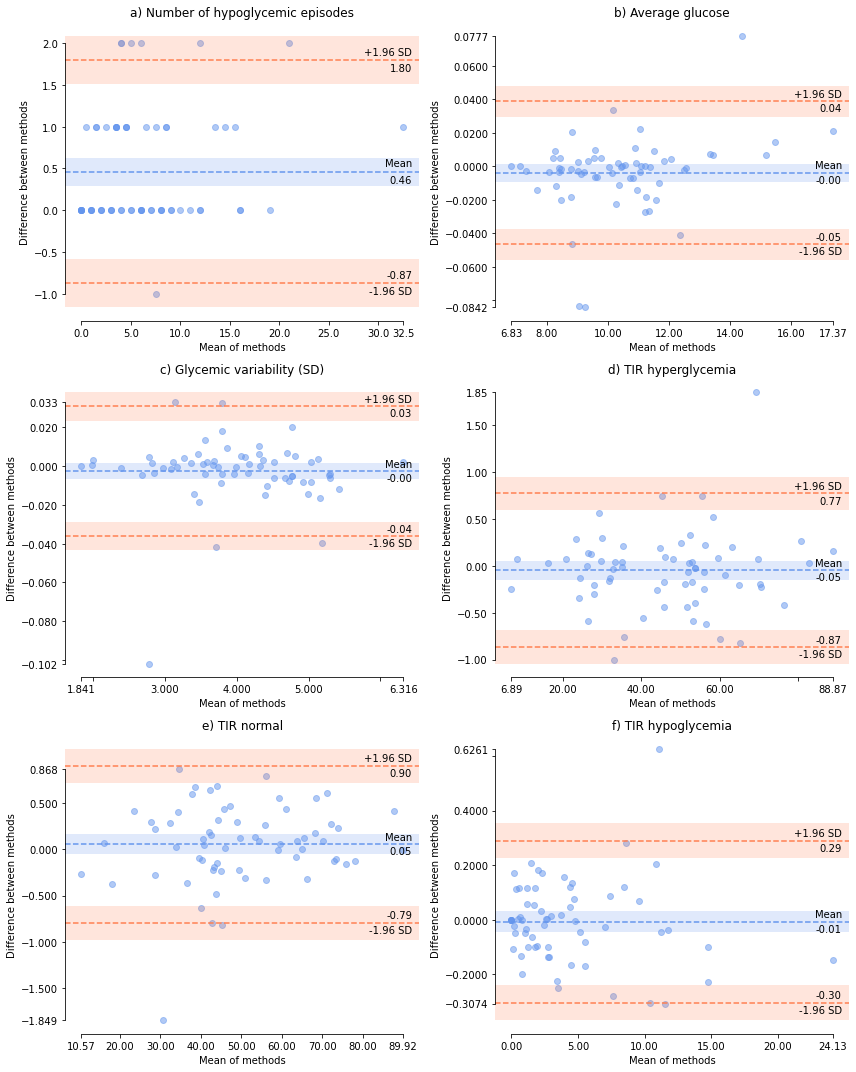

In [51]:
# Create matplotlib figure
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(12,15))
# Number of hypoglycaemic episodes
pyCompare.blandAltman(results_dict['glc']['number hypos'], 
                      results_dict['cut_glc']['number hypos'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False,
                     ax=ax1)
ax1.set_title('a) Number of hypoglycemic episodes')
# Average glucose
pyCompare.blandAltman(results_dict['glc']['avg glucose'], 
                      results_dict['cut_glc']['avg glucose'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False, ax=ax2)
ax2.set_title('b) Average glucose')
# Standard deviation/glycaemic variability
pyCompare.blandAltman(results_dict['glc']['sd'], 
                      results_dict['cut_glc']['sd'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False, ax=ax3)
ax3.set_title('c) Glycemic variability (SD)')
# Time in range (TIR) hyperglycaemia 
pyCompare.blandAltman(results_dict['glc']['TIR hyper (>10)'], 
                      results_dict['cut_glc']['TIR hyper (>10)'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False, ax=ax4)
ax4.set_title('d) TIR hyperglycemia')
# TIR normal
pyCompare.blandAltman(results_dict['glc']['TIR norm (3.9-10)'], 
                      results_dict['cut_glc']['TIR norm (3.9-10)'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False, ax=ax5)
ax5.set_title('e) TIR normal')
# TIR hyperglycaemia
pyCompare.blandAltman(results_dict['glc']['TIR hypo (<3.9)'], 
                      results_dict['cut_glc']['TIR hypo (<3.9)'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False, ax=ax6)
# Set title and save
ax6.set_title('f) TIR hypoglycemia')
fig.tight_layout()
fig.savefig('bland_altmans.png')

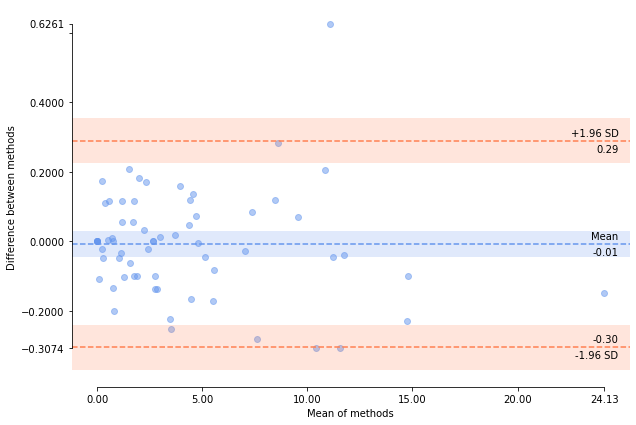

In [26]:
fig.show()

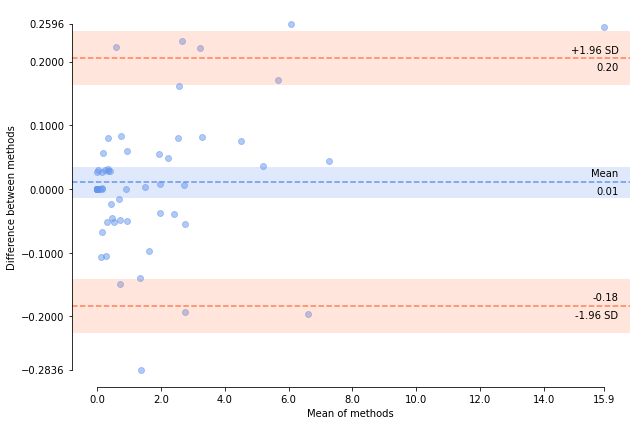

In [9]:
pyCompare.blandAltman(results_dict['glc']['TIR lv2 hypo (<3)'],
                      results_dict['cut_glc']['TIR lv2 hypo (<3)'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

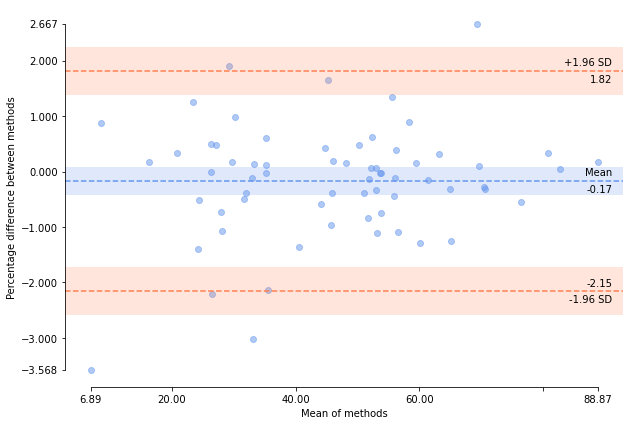

In [10]:
pyCompare.blandAltman(results_dict['glc']['TIR hyper (>10)'], 
                      results_dict['cut_glc']['TIR hyper (>10)'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

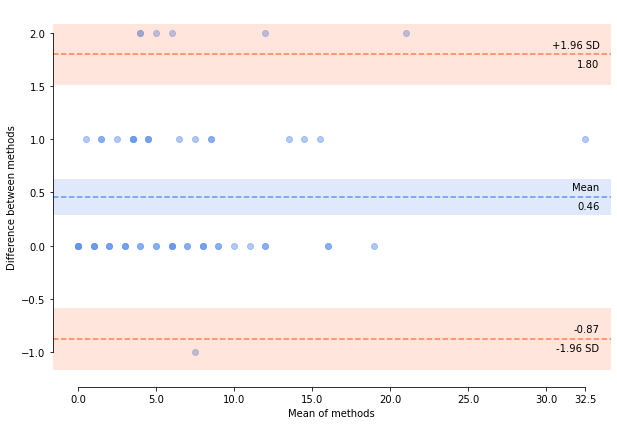

In [11]:
pyCompare.blandAltman(results_dict['glc']['number hypos'], 
                      results_dict['cut_glc']['number hypos'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

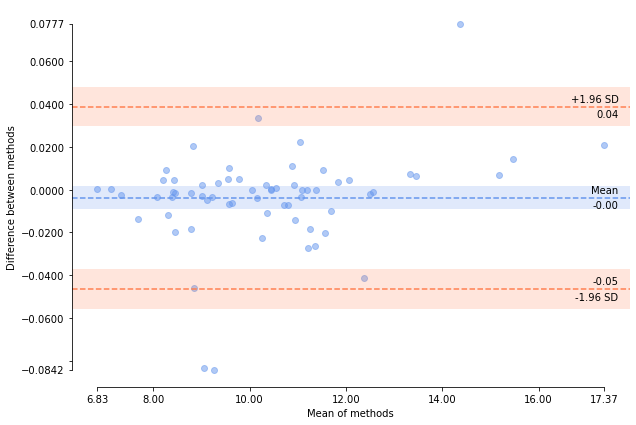

In [18]:
pyCompare.blandAltman(results_dict['glc']['avg glucose'], 
                      results_dict['cut_glc']['avg glucose'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

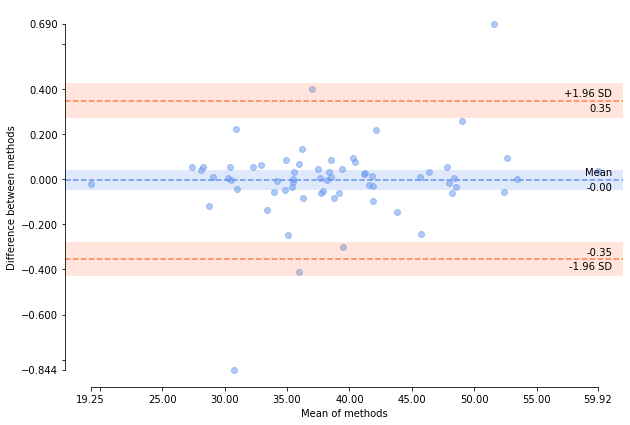

In [19]:
pyCompare.blandAltman(results_dict['glc']['cv'], 
                      results_dict['cut_glc']['cv'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

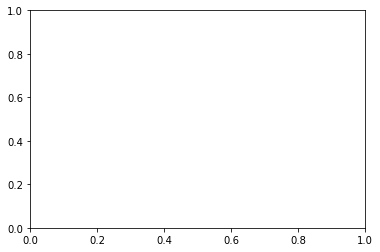

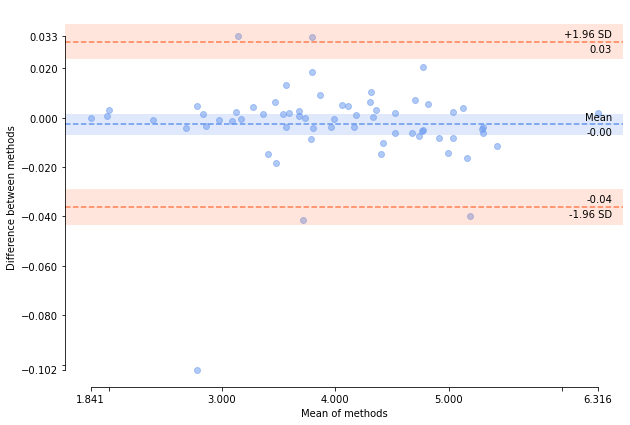

ValueError: x, y, and format string must not be None

In [22]:
fig, ax = plt.subplots()

ax = pyCompare.blandAltman(results_dict['glc']['sd'], 
                      results_dict['cut_glc']['sd'],
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)